In [ ]:
#import python libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
from pandas_datareader import DataReader

In [ ]:
!pip install --upgrade pandas-datareader

!pip install --upgrade pandas

In [ ]:
#get the stock data
from datetime import datetime
from pandas_datareader import data
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)
GOOG = data.DataReader('GOOG','yahoo',start,end)


In [ ]:
GOOG.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,120.985612,117.726761,119.358417,119.301813,2.840324e+07,119.301813
std,16.480292,16.375063,16.583490,16.439701,1.065402e+07,16.439701
min,86.550003,83.449997,85.510002,83.489998,8.567800e+06,83.489998
25%,109.086876,105.710526,107.438000,107.035252,2.161410e+07,107.035252
50%,117.898003,114.694000,116.099998,116.639999,2.589800e+07,116.639999
75%,135.977249,132.878632,134.098747,134.237999,3.282610e+07,134.237999
max,152.100006,147.529007,151.863495,148.720505,8.975000e+07,148.720505


In [ ]:
GOOG.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-06,144.351501,140.647003,143.574005,143.796494,22198000.0,143.796494
2021-12-07,148.300003,145.702499,145.949997,148.036499,23258000.0,148.036499
2021-12-08,149.156494,147.199997,148.331497,148.720505,18964000.0,148.720505
2021-12-09,149.604996,147.529007,148.175995,148.106003,18580000.0,148.106003
2021-12-10,149.399994,147.357498,149.100006,148.675003,21634000.0,148.675003
2021-12-13,148.562500,146.360001,148.444000,146.704498,24104000.0,146.704498
2021-12-14,145.442001,142.242493,144.770004,144.970505,24778000.0,144.970505
2021-12-15,147.517242,142.705505,144.365997,147.368500,27280000.0,147.368500
2021-12-16,148.551498,144.092499,148.076996,144.838501,27400000.0,144.838501


Data Visualisation:

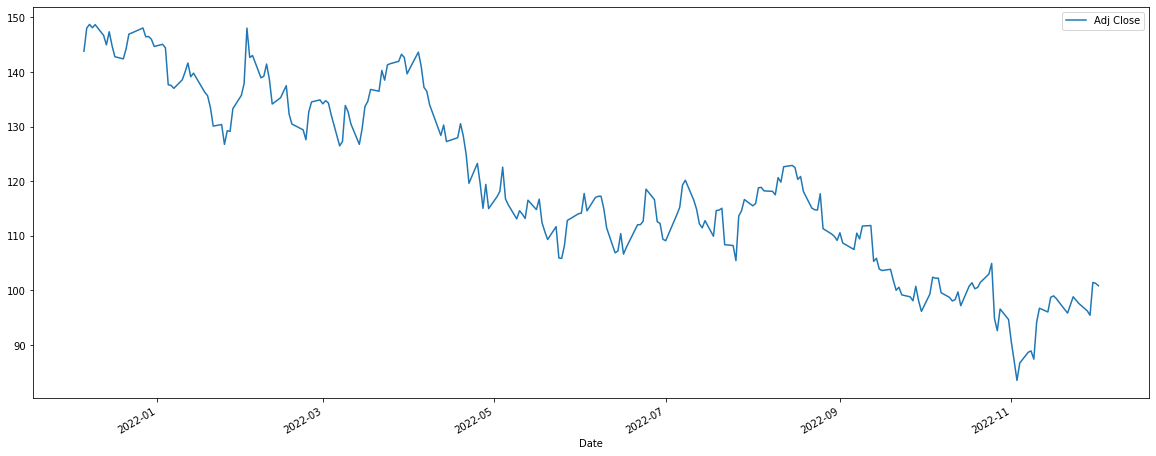

In [ ]:
GOOG['Adj Close'].plot(legend=True,figsize=(20,8))


In [ ]:
#Finding the moving averages
GOOG['SMA10'] = GOOG['Adj Close'].rolling(10).mean()
GOOG['SMA20'] = GOOG['Adj Close'].rolling(20).mean()
GOOG['SMA50'] = GOOG['Adj Close'].rolling(50).mean()
GOOG['SMA100'] = GOOG['Adj Close'].rolling(100).mean()
GOOG['SMA200'] = GOOG['Adj Close'].rolling(200).mean()





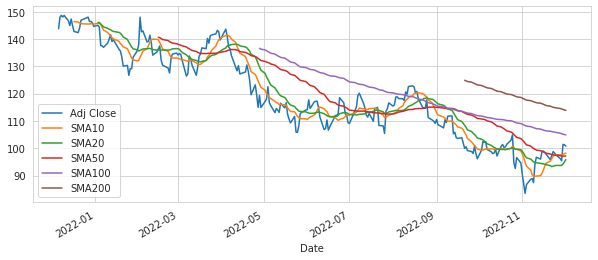

In [ ]:
GOOG[['Adj Close', 'SMA10','SMA20','SMA50','SMA100','SMA200']].plot(subplots=False,figsize=(10,4))

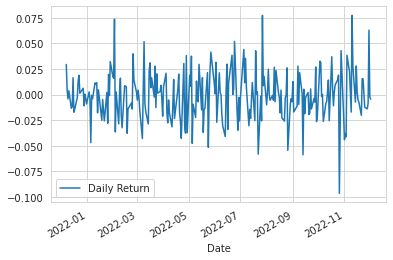

In [ ]:
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()
GOOG['Daily Return'].plot(legend=True)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


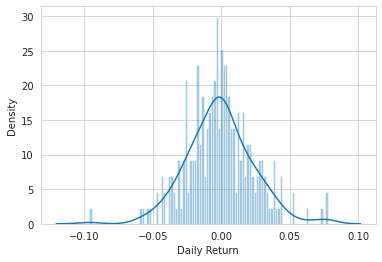

In [ ]:
sns.distplot(GOOG['Daily Return'].dropna(),bins=100)


Text(0, 0.5, 'Risk')

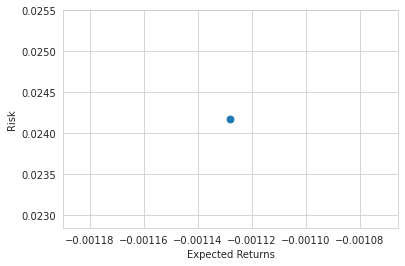

In [ ]:
#Risk Analysis --  Comparing the Risk vs Expected returns
returns = GOOG['Daily Return'].dropna()
area = np.pi*15
plt.scatter(returns.mean(),returns.std(),s=area)
plt.xlabel('Expected Returns')
plt.ylabel('Risk')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


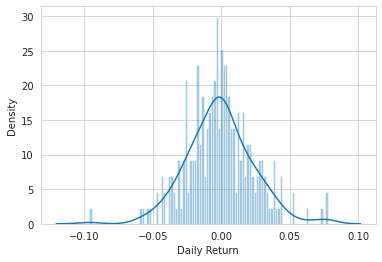

In [25]:
# Visualizing the Value at Risk(VIR)
sns.distplot(GOOG['Daily Return'].dropna(),bins=100)

In [26]:
#Using Quantiles to calculate the numerical risk of the stock
GOOG['Daily Return'].quantile(0.05)


-0.03779630368763155

In [ ]:
#MONTE CARLO
days = 365
dt = 1/days
mu = returns.mean()
sigma = returns.std()
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    sh = np.zeros(days)
    dr = np.zeros(days)
    
    for x in range(1,days):
        sh[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        dr[x] = mu * dt
        price[x] = price[x-1] + (price[x-1]* (dr[x] + sh[x]))
        
    return price


Text(0.5, 1.0, 'Monte Carlo Simulation for Google')

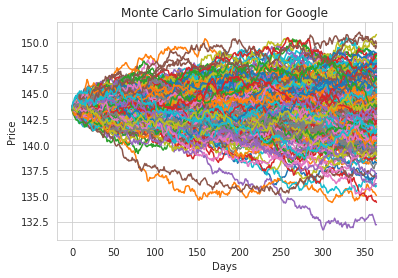

In [ ]:
#running monte carlo 200 times
start_price = 143.574005

for run in range(200):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Simulation for Google')


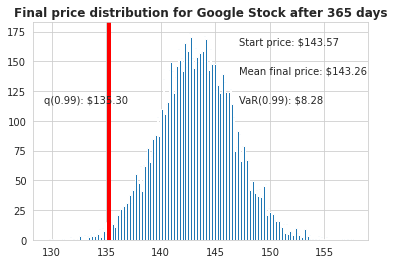

In [ ]:
#Plotting the final Risk Analysis plot using Monte Carlo Simulation
r = 10000
simulations = np.zeros(r)
for r in range(r):
    simulations[r] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
q = np.percentile(simulations,1)
plt.hist(simulations,bins=200)
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)
plt.axvline(x=q, linewidth=4, color='r')
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');
